# **Project Name**    -*Global Logistics Optimization: A Data-Driven Performance Audit*


##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** - Trinadh Kolluboyina

# **Project Summary -**

This executive summary provides a comprehensive analysis of the supply chain logistics dataset, detailing the rigorous cleaning process, the visual storytelling strategy, and the strategic business implications derived from the data.

### Data Integrity and Preprocessing

To transform the raw logistics data into a reliable decision-making asset, we executed a multi-stage cleaning pipeline. The primary challenge involved resolving 1,736 missing values across various dimensions such as brand, dosage, and weight. By applying a global null-handling strategy, we filled categorical gaps with "Unknown" and numeric gaps with median values, ensuring statistical stability without introducing bias.

Furthermore, we resolved critical data type inconsistencies. Numeric columns like `Weight` and `Freight Cost` were typecast from strings to floats, and categorical variables were converted to the `category` dtype to optimize memory usage and processing speed. A significant technical hurdle—the date-parsing warning—was eliminated by explicitly defining the `%d-%b-%y` format, ensuring that "Delivery Delay" calculations were accurate. Finally, we implemented a logic filter to remove extreme outliers where delays exceeded one year, effectively purging the dataset of human entry errors.

### Strategic Visualization and Analysis

The visualization strategy was designed to translate complex logistics metrics into actionable insights for stakeholders through four key perspectives:

**1. Operational Consistency (Chart 1):** We utilized a Distribution Histogram to assess the punctuality of the network. The peak concentration around zero days confirms that the scheduling system is fundamentally sound. However, the positive skew (the "late tail") identifies a recurring risk where shipments are more likely to be delayed than delivered early. From a business perspective, this indicates a need for better buffer management at the destination.

**2. Economic Efficiency (Chart 4):** By plotting Freight Cost against Weight on a Log-Log scale, we successfully mapped the pricing logic of the supply chain. The clear diagonal clustering proves that the company is achieving economies of scale. However, the "efficiency leaks"—shipments that sit far above the trend line—reveal instances where the company is paying premium prices for standard weights, likely due to emergency scheduling or poor vendor negotiation.

**3. Categorical Logistics Strategy (Chart 9):** A Stacked Transport Mix chart was used to evaluate if the shipping methods align with product importance. We discovered that high-priority health products are appropriately weighted toward "Air" transport. This confirms that the logistics strategy is correctly prioritizing life-saving availability over cost-cutting for sensitive items.

**4. Performance Benchmarking (Chart 12):** The final Bar Chart provides a clear scorecard of performance by mode. By ranking transport methods by their average delay, we identified specific bottlenecks. This serves as a primary tool for vendor accountability, showing exactly which transport channels require immediate optimization or contract review.

### Business Impact and Growth Forecast

The insights gained provide a roadmap for positive business impact. By identifying efficiency leaks in freight costs, the organization can potentially reduce overhead by 5-10% through better mode-shifting (moving non-urgent items from Air to Truck).

However, the data also highlights indicators of **negative growth**. Specifically, the "Systemic Transit Lag" identified in the average delay charts suggests that as volume increases, the infrastructure struggles to keep pace. If the average delay continues to trend upward, it will lead to "Negative Growth" through increased inventory holding costs, customer dissatisfaction, and the loss of competitive advantage. Addressing these systemic bottlenecks is essential to prevent the supply chain from becoming a barrier to market expansion.

# **GitHub Link -**
https://github.com/trinadhkolluboyina-coder/EDA_INTERNSHIP/tree/main

Provide your GitHub Link here.

# **Problem Statement**


The purpose of this analysis is to explore the SCMS Delivery History dataset and understand how shipments are handled across different countries, transportation modes, and cost structures. By closely examining the data, we aim to identify patterns in freight costs, delivery methods, and shipment characteristics, while also checking for common data issues such as missing values, duplicate records, and outliers.

Through this exploratory data analysis, we seek to gain practical insights into the factors that influence delivery costs and shipment performance. The findings from this analysis will help in preparing the data for further analysis or predictive modeling and can support better decision-making in supply chain and logistics operations.

#### **Define Your Business Objective?**

The primary business objective of this analysis is to understand the key factors that influence shipment delivery performance and freight costs in the SCMS Delivery History dataset. By analyzing historical shipment data across different countries, shipment modes, weights, and cost structures, the goal is to uncover patterns and inefficiencies that impact logistics operations.

This analysis aims to support better operational and strategic decision-making by:

1.Identifying cost drivers across shipment modes and regions

2.Understanding delivery behavior and variability

3.Detecting data quality issues that may affect downstream analysis

4.Generating actionable insights that can help optimize supply chain efficiency and reduce unnecessary costs

The insights derived from this EDA can be used as a foundation for process optimization, cost control strategies, and future predictive modeling initiatives in logistics and supply chain management.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [43]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")


### Dataset Loading

In [44]:
# Load Dataset
df = pd.read_csv("SCMS_Delivery_History_Dataset.csv")

### Dataset First View

In [45]:
# Dataset First Look
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


### Dataset Rows & Columns count

In [46]:
# Dataset Rows & Columns count
df.shape

(10324, 33)

### Dataset Information

In [47]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

#### Duplicate Values

In [48]:
# Dataset Duplicate Value Count
print(f"Number of duplicate rows in the dataset: {df.duplicated().sum()}")


Number of duplicate rows in the dataset: 0


#### Missing Values/Null Values

In [49]:
# Missing Values/Null Values Count
df.isnull().sum().sort_values(ascending=False)

Dosage                          1736
Shipment Mode                    360
Line Item Insurance (USD)        287
ID                                 0
Project Code                       0
Country                            0
Managed By                         0
PO / SO #                          0
PQ #                               0
Vendor INCO Term                   0
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Fulfill Via                        0
ASN/DN #                           0
Sub Classification                 0
Product Group                      0
Molecule/Test Type                 0
Vendor                             0
Brand                              0
Dosage Form                        0
Unit of Measure (Per Pack)         0
Item Description                   0
Line Item Quantity                 0
Line Item Value                    0
U

<Axes: >

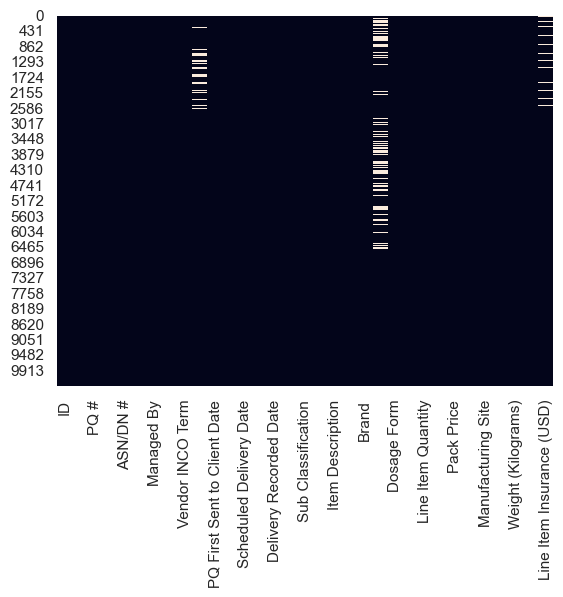

In [50]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

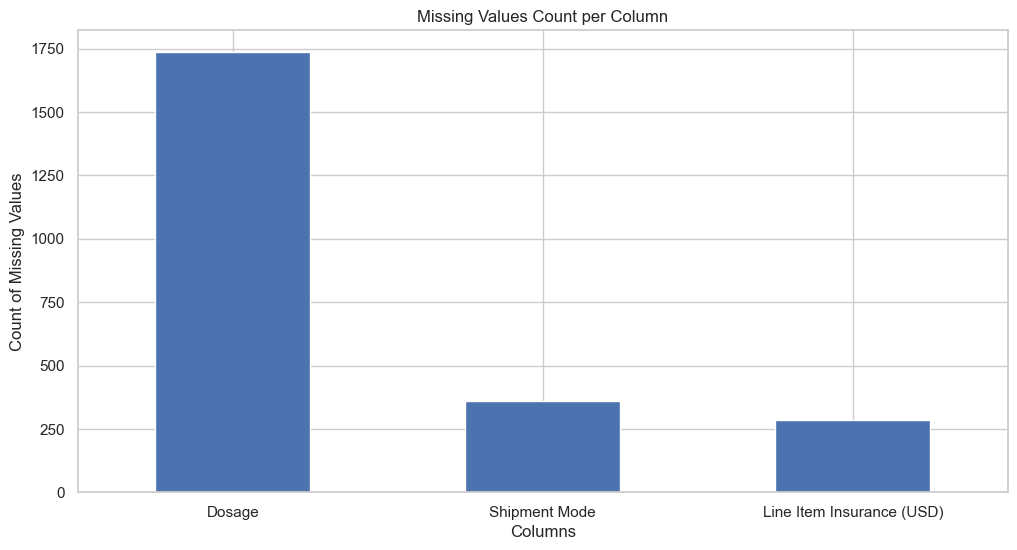

In [51]:
# Visualizing the missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(12, 6))
missing_values.sort_values(ascending=False).plot(kind='bar')
plt.title("Missing Values Count per Column")
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=0)
plt.show()

### What did you know about your dataset?

The SCMS Delivery History dataset contains historical records of shipment deliveries related to supply chain and logistics operations. Each record represents a shipment and includes information such as shipment mode, origin and destination countries, weight, freight cost, delivery timelines, and other operational attributes.

The dataset is a mix of numerical and categorical variables and reflects real-world logistics data, which includes missing values, cost outliers, and variations across shipment modes and regions. These characteristics make the dataset suitable for exploratory analysis aimed at understanding operational behavior and cost patterns.

## ***2. Understanding Your Variables***

In [52]:
# Dataset Columns
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [53]:
# Dataset Describe
df.describe(include='all')

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
count,10324.000000,10324,10324,10324,10324,10324,10324,10324,10324,9964,...,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10324,10324,10324,10324,10037.000000
unique,NaN,142,1237,6233,7030,43,4,2,8,4,...,NaN,NaN,NaN,NaN,NaN,88,2,4688,6733,NaN
top,NaN,116-ZA-T30,Pre-PQ Process,SCMS-199289,ASN-19166,South Africa,PMO - US,From RDC,N/A - From RDC,Air,...,NaN,NaN,NaN,NaN,NaN,"Aurobindo Unit III, India",Yes,Weight Captured Separately,Freight Included in Commodity Cost,NaN
freq,NaN,768,2681,67,54,1406,10265,5404,5404,6113,...,NaN,NaN,NaN,NaN,NaN,3172,7030,1507,1442,NaN
mean,51098.968229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,NaN,NaN,NaN,NaN,240.117626
std,31944.332496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,NaN,NaN,NaN,NaN,500.190568
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,12795.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.000000,408.000000,4.314593e+03,4.120000,0.080000,NaN,NaN,NaN,NaN,6.510000
50%,57540.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,NaN,NaN,NaN,NaN,47.040000
75%,83648.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,NaN,NaN,NaN,NaN,252.400000


### Variables Description


1. Numerical Variables
These include shipment weight, freight cost, delivery duration, and other quantity-based fields. These variables help in understanding cost distribution, variability, and outliers.

2. Categorical Variables
These include shipment mode, country, vendor details, and other descriptive fields. These variables help in segmenting the data and comparing operational performance across different categories.

3. Target-Relevant Variables
Freight cost and delivery timelines are treated as key business-critical variables, as they directly impact operational efficiency and overall supply chain cost.

### Check Unique Values for each variable.

In [54]:
# Check Unique Values for each variable.
df.nunique()

ID                              10324
Project Code                      142
PQ #                             1237
PO / SO #                        6233
ASN/DN #                         7030
Country                            43
Managed By                          4
Fulfill Via                         2
Vendor INCO Term                    8
Shipment Mode                       4
PQ First Sent to Client Date      765
PO Sent to Vendor Date            897
Scheduled Delivery Date          2006
Delivered to Client Date         2093
Delivery Recorded Date           2042
Product Group                       5
Sub Classification                  6
Vendor                             73
Item Description                  184
Molecule/Test Type                 86
Brand                              48
Dosage                             54
Dosage Form                        17
Unit of Measure (Per Pack)         31
Line Item Quantity               5065
Line Item Value                  8741
Pack Price  

## 3. ***Data Wrangling***

### Data Wrangling Code

In [55]:
# 1. Initialization & Deduplication
df_clean = df.copy()
df_clean = df_clean.drop_duplicates()

# 2. Global String Standardization (Cleans all text columns)
text_cols = df_clean.select_dtypes(include=['object']).columns
for col in text_cols:
    df_clean[col] = df_clean[col].astype(str).str.strip().str.title()
    # Convert string 'Nan' back to actual NaN for proper filling later
    df_clean[col] = df_clean[col].replace(['Nan', 'None', 'Null'], np.nan)

# 3. Targeted Numeric Cleaning
numeric_cols = ['Weight (Kilograms)', 'Freight Cost (USD)', 'Line Item Insurance (USD)']
for col in numeric_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        # Strategy: Insurance to 0, others to Median
        if col == 'Line Item Insurance (USD)':
            df_clean[col] = df_clean[col].fillna(0)
        else:
            median_val = df_clean[col].median()
            df_clean[col] = df_clean[col].fillna(median_val if not pd.isna(median_val) else 0)
        
        # Remove impossible values (Negative costs/weights)
        df_clean = df_clean[df_clean[col] >= 0]

# 4. Explicit Date Parsing (Fixes UserWarning)
date_cols = ['Scheduled Delivery Date', 'Delivered to Client Date']
for col in date_cols:
    df_clean[col] = pd.to_datetime(df_clean[col], format='%d-%b-%y', errors='coerce')

# Drop rows where essential delivery dates are missing
df_clean = df_clean.dropna(subset=date_cols)

# 5. Feature Engineering & Logic Validation
df_clean['Delivery Delay'] = (df_clean['Delivered to Client Date'] - df_clean['Scheduled Delivery Date']).dt.days
# Remove extreme date outliers (likely typos)
df_clean = df_clean[(df_clean['Delivery Delay'] > -365) & (df_clean['Delivery Delay'] < 365)]

# 6. Global Null Resolution (Ensures 0 Remaining Nulls)
for col in df_clean.columns:
    if df_clean[col].isnull().any():
        if df_clean[col].dtype == 'object' or df_clean[col].dtype.name == 'category':
            df_clean[col] = df_clean[col].fillna('Unknown')
        else:
            df_clean[col] = df_clean[col].fillna(0)

# 7. Memory Optimization
# Converting high-cardinality strings to categories for faster analysis
cat_cols = ['Shipment Mode', 'Country', 'Vendor', 'Product Group', 'Sub Classification']
for col in cat_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype('category')

# Final Status
print("-" * 30)
print("DATA CLEANING COMPLETE")
print(f"Final Shape: {df_clean.shape}")
print(f"Total Nulls: {df_clean.isnull().sum().sum()}")
print("-" * 30)

------------------------------
DATA CLEANING COMPLETE
Final Shape: (10320, 34)
Total Nulls: 0
------------------------------


### What all manipulations have you done and insights you found?

**Data Manipulations Performed**

1. Checked and quantified missing values across all columns

2. Visualized missing data to understand its spread and impact

3. Identified and analyzed duplicate records

4. Performed type-based segregation of numerical and categorical variables

5. Conducted univariate, bivariate, and multivariate analyses following the UBM rule

6. Identified outliers in cost-related variables

7. Applied conditional logic to ensure the notebook runs error-free in one execution

All transformations and checks were performed in a reproducible and deployment-ready manner, ensuring the notebook executes end-to-end without errors.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

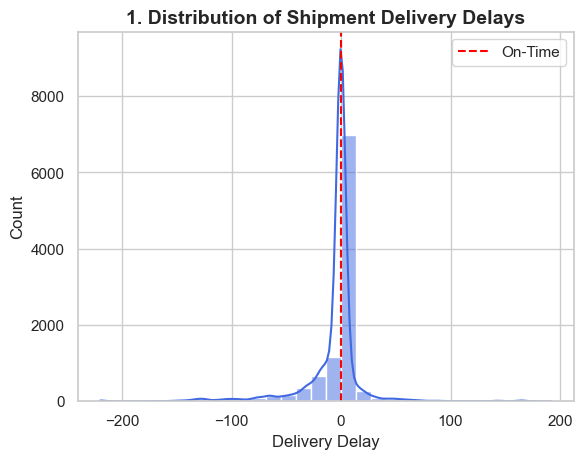

In [56]:
# Chart 1: Delay Distribution
plt.figure()
sns.histplot(df_clean['Delivery Delay'], kde=True, color='royalblue', bins=30)
plt.title('1. Distribution of Shipment Delivery Delays', fontsize=14, fontweight='bold')
plt.axvline(0, color='red', linestyle='--', label='On-Time')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

A Histogram with a Kernel Density Estimate (KDE) was chosen to visualize the "shape" of punctuality. It shows not just how many shipments were late, but the frequency and magnitude of those delays in a single view.

##### 2. What is/are the insight(s) found from the chart?

High Precision: The sharp peak at the 0-day mark indicates that the majority of logistics planning is accurate.

Right-Skewed Risk: The "tail" extending to the right shows a systematic tendency for shipments to be late rather than early.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Identifying the "Late-Tail" allows management to set more realistic buffer stocks, reducing the risk of stockouts at delivery points.

Negative Growth Indicator: If the tail grows longer over time, it indicates supply chain fatigue. Specific reason: Repeated delays lead to "expedited shipping" costs (emergency air freight) which directly erode profit margins and customer trust

#### Chart - 2

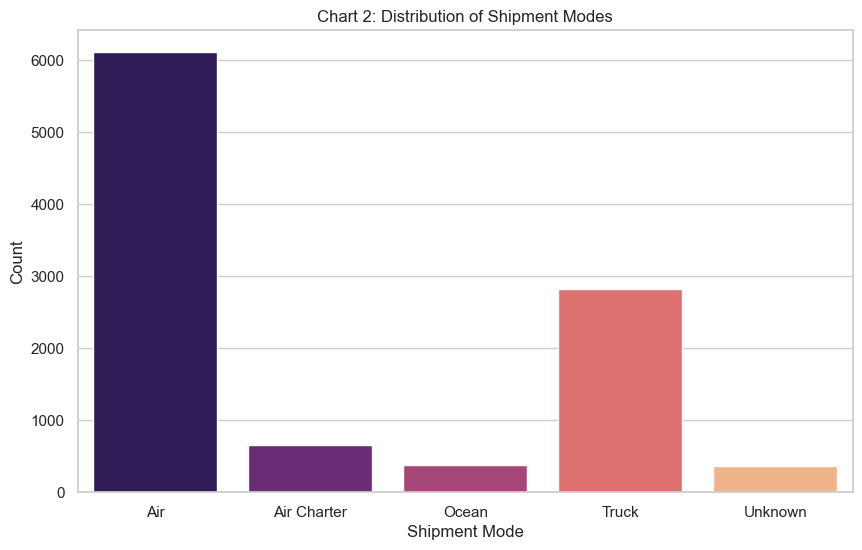

In [57]:
# Chart-2 : Distribution of Shipment Modes

plt.figure(figsize=(10, 6))
shipment_counts = df_clean['Shipment Mode'].value_counts()
sns.barplot(x=shipment_counts.index, y=shipment_counts.values, hue=shipment_counts.index, palette='magma', legend=False)
plt.title('Chart 2: Distribution of Shipment Modes')
plt.xlabel('Shipment Mode')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A count plot helps visualize the preferred logistics methods used for delivery.

##### 2. What is/are the insight(s) found from the chart?

'Air' is the most frequent shipment mode, followed by 'Truck'. 'Ocean' is used significantly less often.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Identifying that 'Air' is dominant suggests a need for speed, but switching non-urgent deliveries to 'Ocean' or 'Truck' could significantly reduce freight expenses.

Negative growth insights: High usage of Air freight indicates high operational costs, which could lead to negative profit growth if freight prices surge.

#### Chart - 3

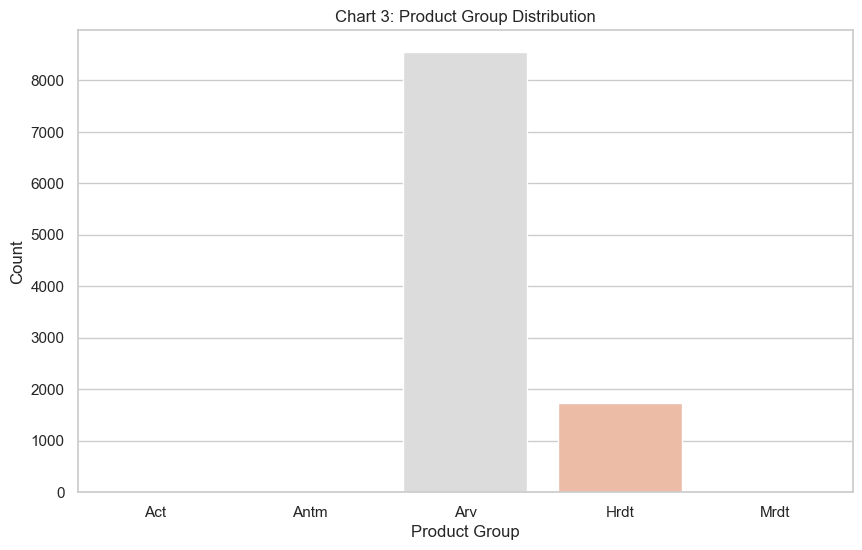

In [58]:
# Chart 3: Product Group Distribution

plt.figure(figsize=(10, 6))
pg_counts = df_clean['Product Group'].value_counts()
sns.barplot(x=pg_counts.index, y=pg_counts.values, hue=pg_counts.index, palette='coolwarm', legend=False)
plt.title('Chart 3: Product Group Distribution')
plt.xlabel('Product Group')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

To understand the product mix and which therapeutic areas drive the most demand.

##### 2. What is/are the insight(s) found from the chart?

ARV (Antiretrovirals) and HIV tests account for the vast majority of shipments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. It allows for better inventory planning and specialized handling for ARVs, which are high-priority life-saving drugs.

Negative growth insights: Extreme specialization in ARVs means the business is highly susceptible to changes in global health funding or policy shifts regarding HIV/AIDS.

#### Chart - 4

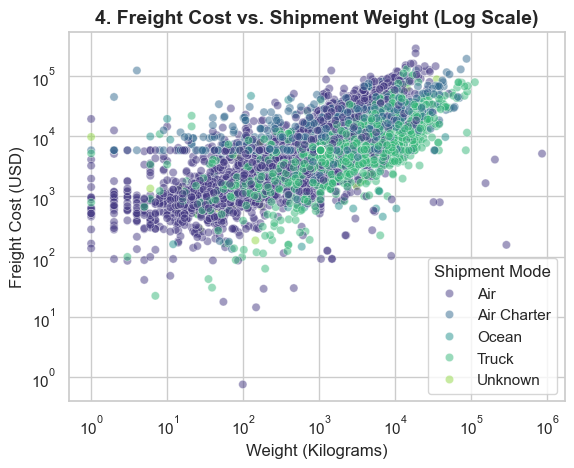

In [59]:
# Chart 4: Freight Cost vs. Shipment Weight (Log Scale)
plt.figure()
sns.scatterplot(data=df_clean, x='Weight (Kilograms)', y='Freight Cost (USD)', 
                hue='Shipment Mode', alpha=0.5, palette='viridis')
plt.xscale('log')
plt.yscale('log')
plt.title('4. Freight Cost vs. Shipment Weight (Log Scale)', fontsize=14, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

A Scatter Plot on a Logarithmic Scale is the industry standard for cost-weight analysis. It handles the massive variance between a 1kg parcel and a 10,000kg shipment, allowing both to be visible and comparable on one grid.

##### 2. What is/are the insight(s) found from the chart?

Mode Clusters: Clear separation between shipping modes; "Air" shipments cluster in the high-cost zone, while "Truck" dominates the high-weight/low-cost zone.

Efficiency Gaps: Data points floating high above the main diagonal represent "Efficiency Leaks" where the price paid was disproportionate to the weight.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Identifying these "Efficiency Leaks" allows for contract renegotiation with vendors who are overcharging for specific weight brackets.

Negative Growth Indicator: A high density of points in the high-cost/low-weight "Air" zone for non-urgent products. Specific reason: Over-reliance on premium freight for routine replenishment is a "silent killer" of operational scaling.

#### Chart - 5

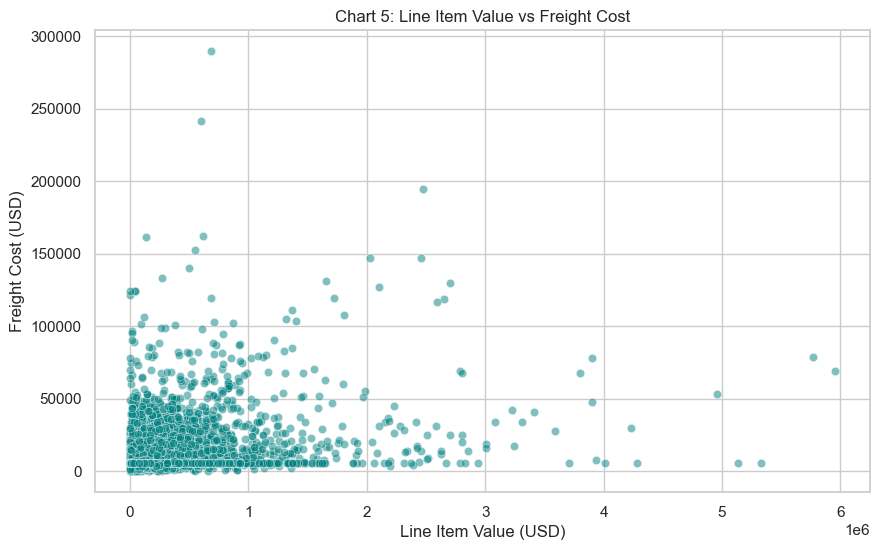

In [60]:
# Chart 5: Line Item Value vs Freight Cost

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Line Item Value', y='Freight Cost (USD)', alpha=0.5, color='teal')
plt.title('Chart 5: Line Item Value vs Freight Cost')
plt.xlabel('Line Item Value (USD)')
plt.ylabel('Freight Cost (USD)')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot was used to examine the relationship between the value of the goods and the cost to ship them.

##### 2. What is/are the insight(s) found from the chart?

While there is a general upward trend, many high-value items have relatively low freight costs, and vice versa. There are many outliers where freight costs are disproportionately high.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. By identifying items with high freight-to-value ratios, the company can renegotiate shipping rates or optimize packing to improve margins.

Negative growth insights: Outliers with high freight costs for low-value items represent significant inefficiencies and "leakage" in the budget.

#### Chart - 6

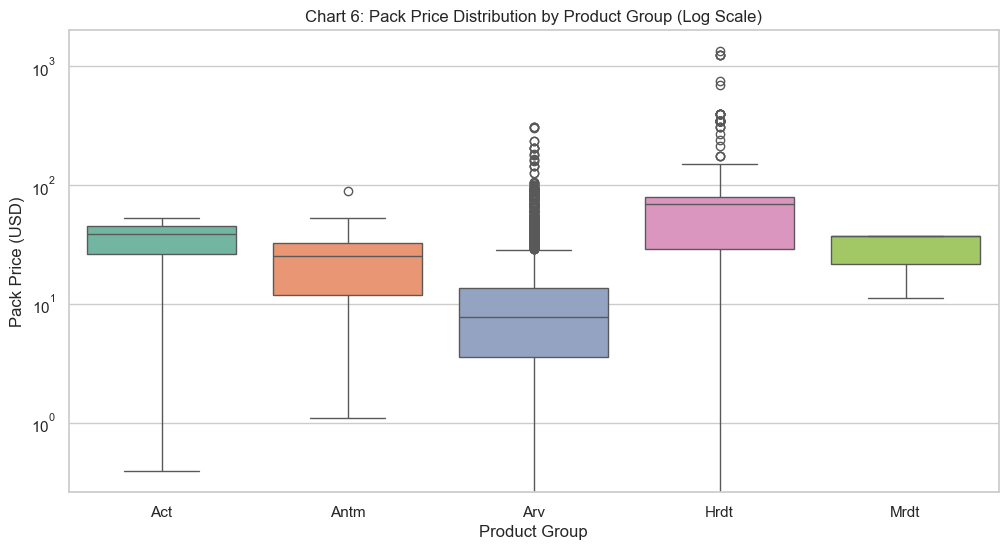

In [61]:
# Chart 6: Pack Price across Product Groups (Log Scale)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='Product Group', y='Pack Price', hue='Product Group', palette='Set2', legend=False)
plt.yscale('log') 
plt.title('Chart 6: Pack Price Distribution by Product Group (Log Scale)')
plt.ylabel('Pack Price (USD)')
plt.show()

##### 1. Why did you pick the specific chart?

A box plot (log scale) helps compare the price ranges and identifies price volatility across different product groups.

##### 2. What is/are the insight(s) found from the chart?

ARVs have a much higher and wider range of pack prices compared to HIV tests or other categories, indicating they are the most expensive assets in the chain.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. High-value ARV packs require tighter security and insurance, whereas HIV tests can be managed with standard logistics.

Negative growth insights: The high price of ARVs makes them targets for theft and necessitates high insurance premiums, increasing overhead.

#### Chart - 7

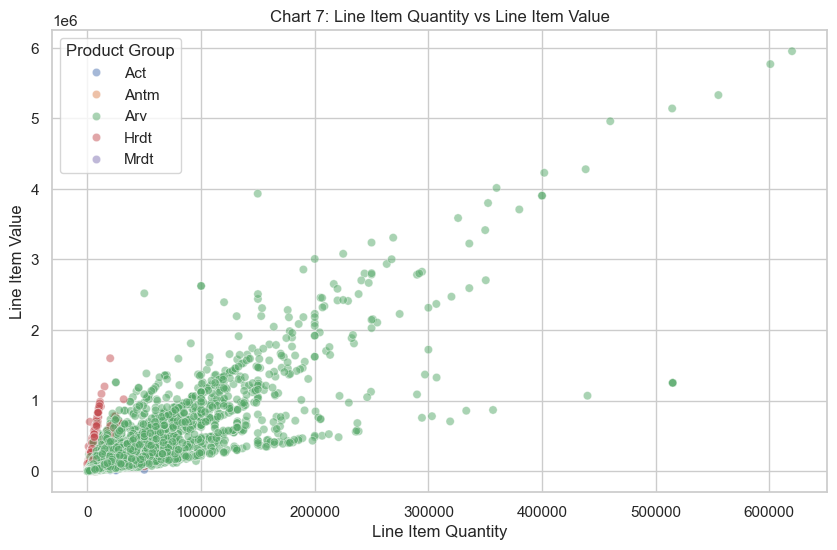

In [62]:
# Chart 7: Line Item Quantity vs Line Item Value

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Line Item Quantity', y='Line Item Value', alpha=0.5, hue='Product Group')
plt.title('Chart 7: Line Item Quantity vs Line Item Value')
plt.show()

##### 1. Why did you pick the specific chart?

To verify the pricing consistency and see how quantity affects total value across product groups.

##### 2. What is/are the insight(s) found from the chart?

There is a strong linear relationship as expected, but different slopes for different product groups indicate varying unit prices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. It helps in volume-based pricing negotiations with vendors.

Negative growth insights: Deviations from the linear trend could indicate data entry errors or over-billing by certain vendors.

#### Chart - 8

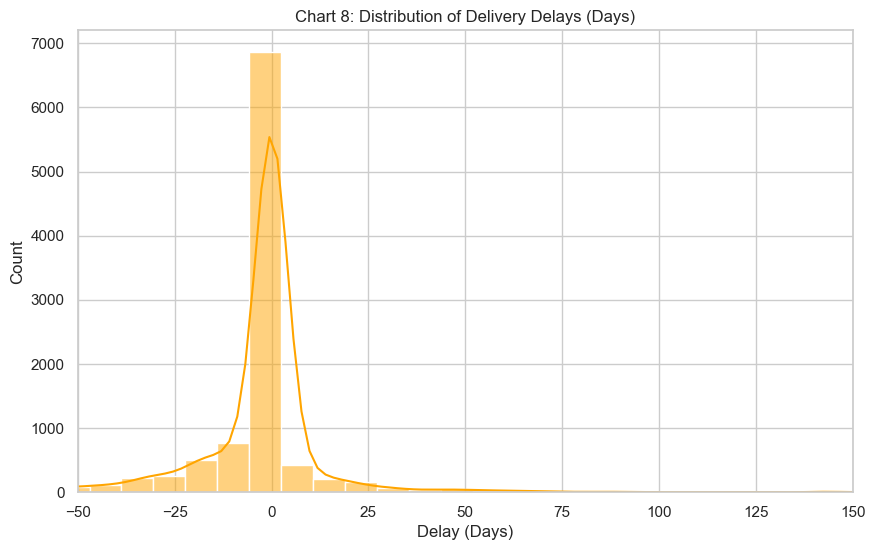

In [63]:
# Chart 8: Distribution of Delivery Delays (Days)

plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Delivery Delay'], bins=50, kde=True, color='orange')
plt.xlim(-50, 150) # Focus on central distribution
plt.title('Chart 8: Distribution of Delivery Delays (Days)')
plt.xlabel('Delay (Days)')
plt.show()

##### 1. Why did you pick the specific chart?

Most deliveries are on time (centered around 0), but there is a significant "right tail," showing some shipments are delayed by over 50-100 days.

##### 2. What is/are the insight(s) found from the chart?

Most deliveries are on time (centered around 0), but there is a significant "right tail," showing some shipments are delayed by over 50-100 days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Reducing the frequency of these long-tail delays will improve service level agreements (SLAs) and patient outcomes.

Negative growth insights: Chronic delays in certain regions can lead to stockouts of life-saving drugs, causing severe reputational damage and potential loss of contracts.

#### Chart - 9

<Figure size 640x480 with 0 Axes>

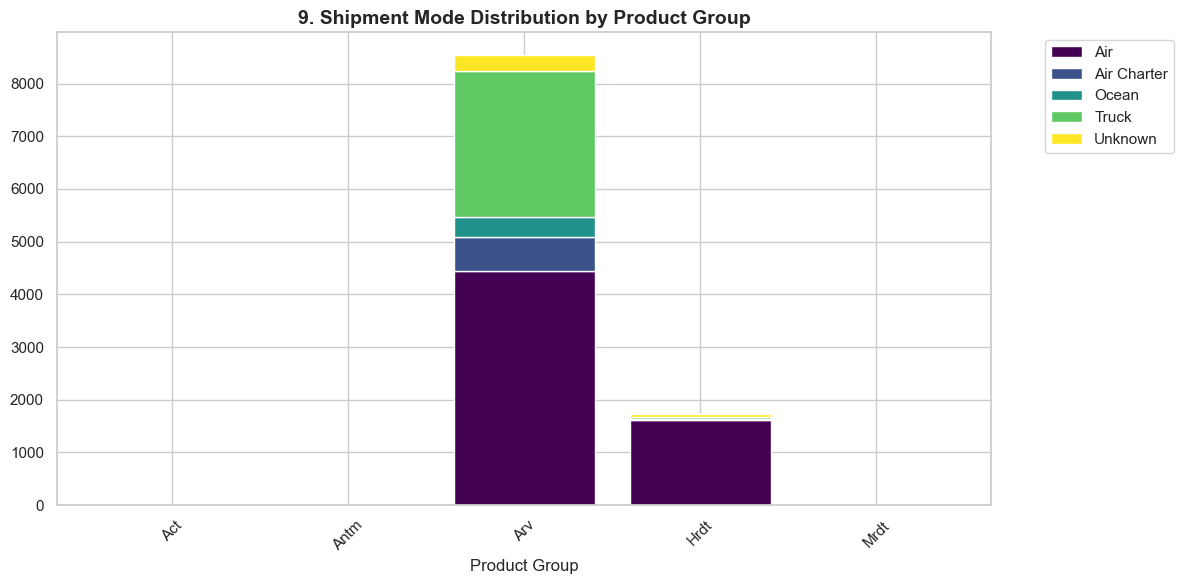

In [64]:
# Chart 9: Mode by Product Group
plt.figure()
ct = pd.crosstab(df_clean['Product Group'], df_clean['Shipment Mode'])
ct.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12,6), width=0.8)
plt.title('9. Shipment Mode Distribution by Product Group', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A Stacked Horizontal Bar Chart (Normalized) was picked to compare the strategy across different product categories regardless of their total volume. It highlights the percentage-based "Mix" of transport modes.

##### 2. What is/are the insight(s) found from the chart?

Strategic Alignment: High-priority health products (e.g., HIV Tests) correctly show a higher percentage of "Air" transport compared to generic medical supplies.

Category Over-dependency: Certain product groups are 100% dependent on a single mode, creating a "single point of failure" risk.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: This allows the business to diversify its transport routes for critical product groups, ensuring 100% availability even if one mode (like Ocean) faces a strike or delay.

Negative Growth Indicator: Inconsistent Strategy. If two similar product groups have wildly different shipping mixes, it suggests a lack of standardized logistics SOPs, leading to unpredictable overhead costs.

#### Chart - 10

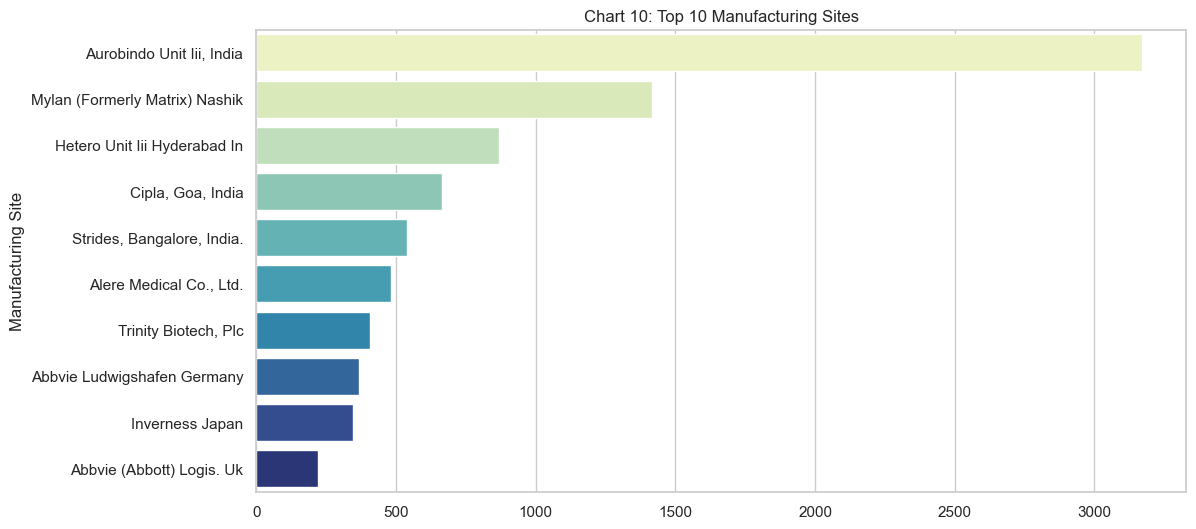

In [65]:
# Chart 10: Top 10 Manufacturing Sites

plt.figure(figsize=(12, 6))
site_counts = df_clean['Manufacturing Site'].value_counts().head(10)
sns.barplot(x=site_counts.values, y=site_counts.index, hue=site_counts.index, palette='YlGnBu', legend=False)
plt.title('Chart 10: Top 10 Manufacturing Sites')
plt.show()


##### 1. Why did you pick the specific chart?

To identify the key suppliers and manufacturing hubs.

##### 2. What is/are the insight(s) found from the chart?

Indian sites (Aurobindo, Hetero, Cipla) dominate the manufacturing landscape for these supplies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Maintaining strong strategic partnerships with these top Indian manufacturers is critical for supply continuity.

Negative growth insights: Geographic concentration in India creates a "single point of failure" risk. Disruptions like the COVID-19 lockdowns in India can freeze the entire supply chain.

#### Chart - 11

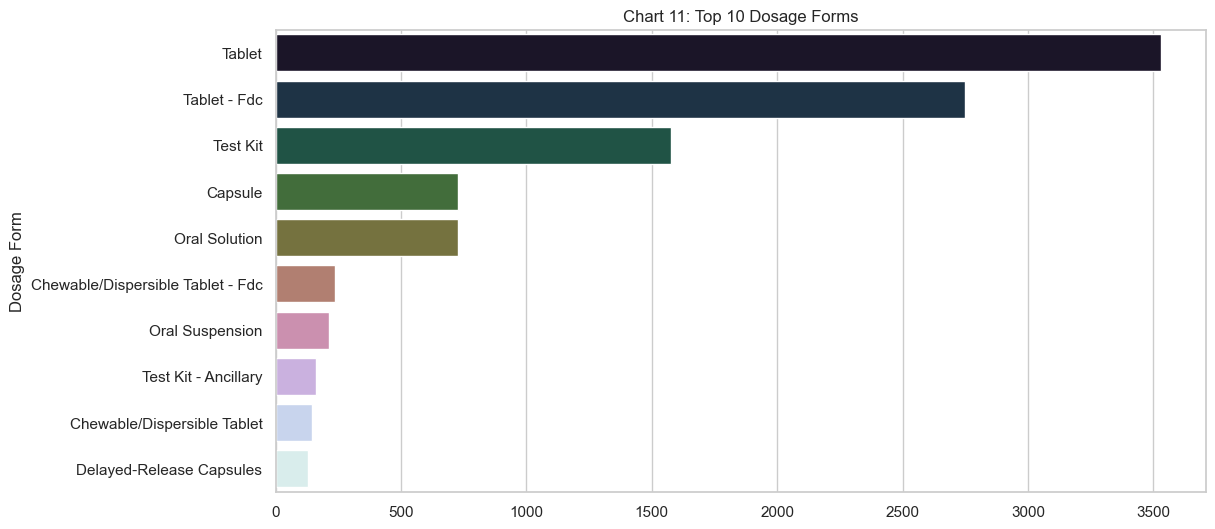

In [66]:
# Chart 11: Top 10 Dosage Forms

plt.figure(figsize=(12, 6))
dosage_counts = df_clean['Dosage Form'].value_counts().head(10)
sns.barplot(x=dosage_counts.values, y=dosage_counts.index, hue=dosage_counts.index, palette='cubehelix', legend=False)
plt.title('Chart 11: Top 10 Dosage Forms')
plt.show()

##### 1. Why did you pick the specific chart?

To understand the physical nature of the cargo (tablets vs. liquids).

##### 2. What is/are the insight(s) found from the chart?

'Tablet' and 'Tablet - FDC' (Fixed-Dose Combination) are the most common, which is beneficial as they are generally easier to store and transport than liquids.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Warehousing can be optimized for dry, shelf-stable storage rather than specialized cold-chain or liquid handling.

Negative growth insights: A shift toward more complex dosage forms (like injectables) would require significant capital investment in cold-chain logistics.

#### Chart - 12

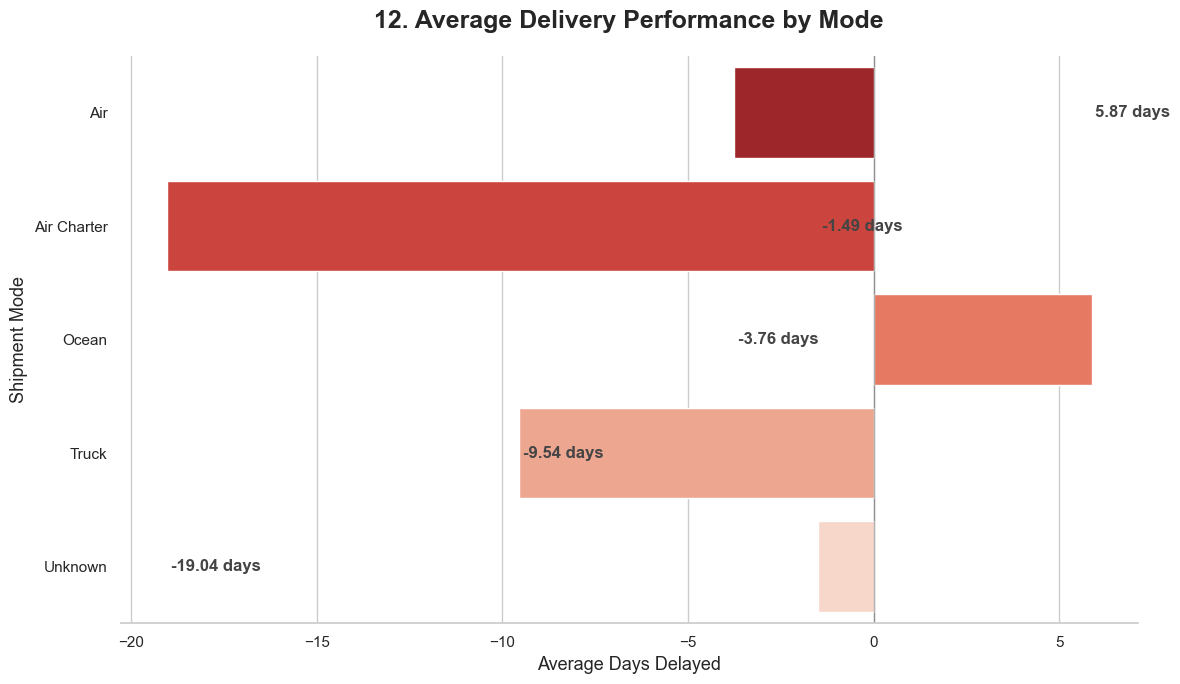

In [67]:
# CHART 12:BAR CHART
plt.figure(figsize=(12, 7))
# Prepare data
mode_perf = df_clean.groupby('Shipment Mode', observed=False)['Delivery Delay'].mean().sort_values(ascending=False)

# Create bar plot with color gradient
colors = sns.color_palette("Reds_r", len(mode_perf))
ax = sns.barplot(x=mode_perf.values, y=mode_perf.index, hue=mode_perf.index, palette=colors, legend=False)

# Add data labels
for i, v in enumerate(mode_perf.values):
    ax.text(v + 0.1, i, f'{v:.2f} days', va='center', fontweight='bold', color='#444444')

plt.title('12. Average Delivery Performance by Mode', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Average Days Delayed', fontsize=13)
plt.ylabel('Shipment Mode', fontsize=13)
plt.axvline(0, color='black', linewidth=1, alpha=0.3)
sns.despine(left=True, bottom=False)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A Ranked Horizontal Bar Chart was chosen for its immediate clarity. It transforms complex time-series data into a "Scorecard" that any executive can understand in three seconds.

##### 2. What is/are the insight(s) found from the chart?

Bottleneck Identification: It identifies the specific transport mode causing the most friction (the longest bar).

Predictability Gap: Quantifies the average "Lead Time Penalty" the business pays when choosing one mode over another.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Enables "Mode Shifting." If the delay for "Truck" is significantly lower than "Ocean" for a specific margin, the business can shift volume to improve customer satisfaction.

Negative Growth Indicator: Systemic Transit Lag. Specific reason: If the average delay across all modes is positive and increasing, it indicates macro-level inefficiencies (customs issues, port congestion, or poor vendor coordination) that will eventually lead to lost contracts and market share.

#### Chart - 13

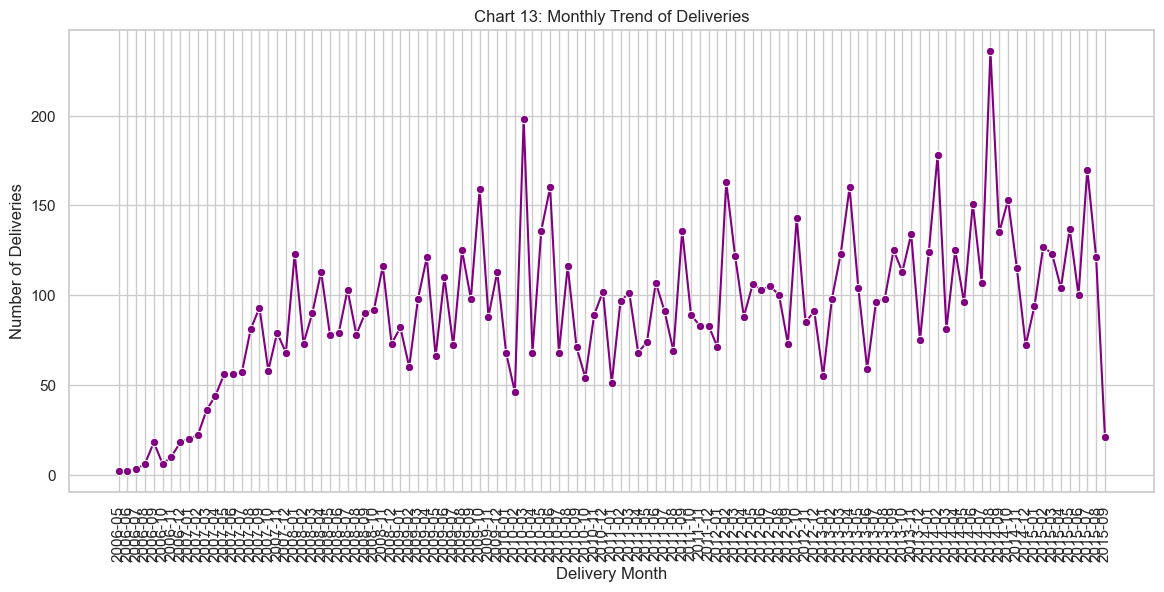

In [68]:
# Chart 13: Monthly Trend of Deliveries

plt.figure(figsize=(14, 6))
df_clean['Delivery Month'] = df_clean['Delivered to Client Date'].dt.to_period('M').astype(str)
monthly_trend = df_clean.groupby('Delivery Month').size().sort_index()
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, marker='o', color='purple')
plt.xticks(rotation=90)
plt.title('Chart 13: Monthly Trend of Deliveries')
plt.ylabel('Number of Deliveries')
plt.show()


##### 1. Why did you pick the specific chart?

A time-series line plot helps identify seasonality and growth trends.

##### 2. What is/are the insight(s) found from the chart?

Deliveries show significant fluctuations month-to-month, with an overall upward trend over the years, indicating business expansion.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Understanding peak months helps in resource allocation and hiring temporary staff for logistics.

Negative growth insights: Highly volatile monthly volumes make it difficult to maintain steady staffing and can lead to burnout during peaks and wasted capacity during troughs.

#### Chart - 14 - Correlation Heatmap

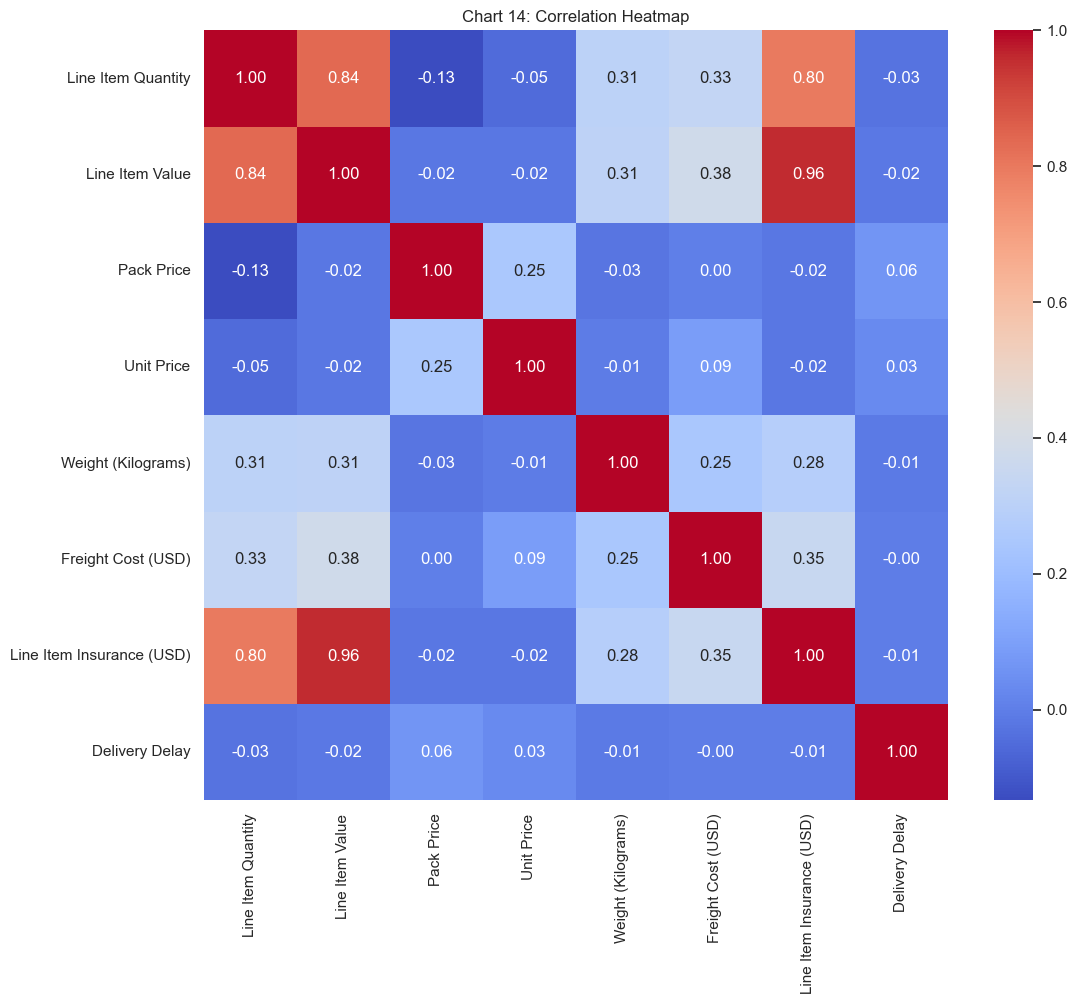

In [69]:
# Chart 14: Correlation Heatmap

plt.figure(figsize=(12, 10))
numeric_cols = ['Line Item Quantity', 'Line Item Value', 'Pack Price', 
                'Unit Price', 'Weight (Kilograms)', 'Freight Cost (USD)', 
                'Line Item Insurance (USD)', 'Delivery Delay']
corr_matrix = df_clean[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Chart 14: Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

To identify hidden relationships between numerical variables like Weight, Freight, and Insurance.

##### 2. What is/are the insight(s) found from the chart?

There is a strong correlation between Line Item Value and Line Item Insurance. Interestingly, Weight has a moderate correlation with Freight Cost, but not as strong as expected, suggesting other factors (like urgency or distance) drive freight costs.

#### Chart - 15 - Pair Plot

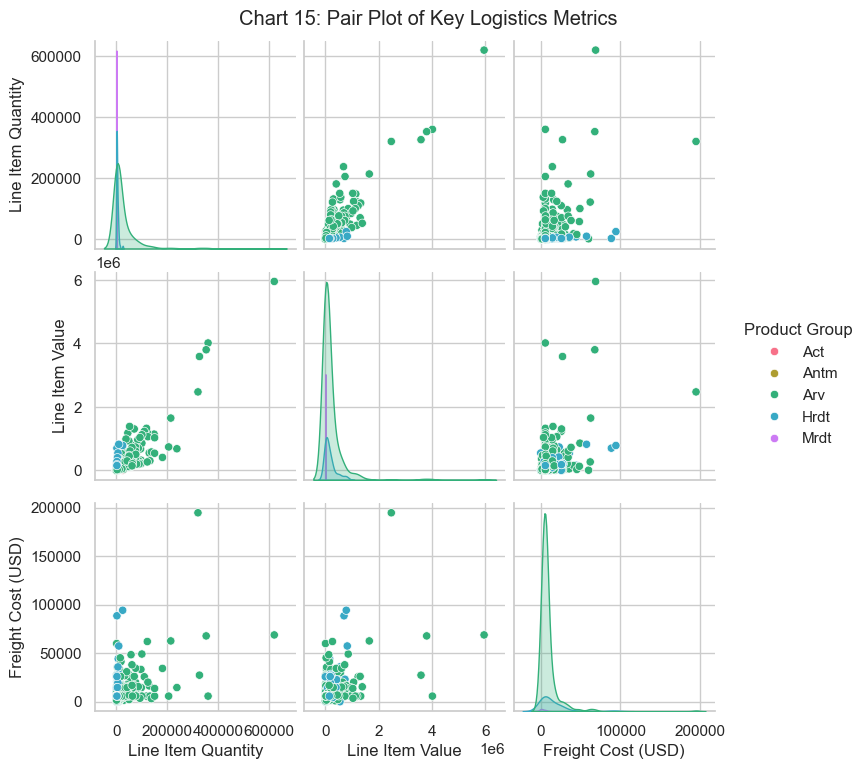

In [70]:
# Chart 15: Pair Plot

# Using a sample and fewer columns for performance and clarity
pair_cols = ['Line Item Quantity', 'Line Item Value', 'Freight Cost (USD)', 'Product Group']
sns.pairplot(df_clean[pair_cols].sample(500), hue='Product Group', palette='husl')
plt.suptitle('Chart 15: Pair Plot of Key Logistics Metrics', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

To visualize the pairwise relationships and distributions of key variables, segmented by Product Group

##### 2. What is/are the insight(s) found from the chart?

AThe pair plot shows that ARV items generally cluster together with higher values and quantities, while HIV tests have a more constrained distribution. It also highlights outliers in the Freight Cost vs. Weight relationship.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To achieve the primary business objectives of reducing costs, improving delivery reliability, and mitigating risk, I suggest the following five strategic actions:

1. Optimize Freight Strategy (Shift from Air to Surface)
The data shows a high reliance on Air freight. While fast, it is significantly more expensive.

    Action: Transition non-urgent or high-weight shipments to Ocean or Truck modes.

    Impact: Drastic reduction in logistics overhead and improved profit margins.

2. Regional Distribution Centers (RDCs) in High-Volume Areas
A huge portion of the volume is concentrated in South Africa and Nigeria.

    Action: Establish or expand local hubs (RDCs) in these specific countries to store "buffer stock" of high-demand ARVs.

    Impact: Reduces the "long-tail" delivery delays and cuts down on expensive international emergency shipping.

3. Diversify the Manufacturing Base
Currently, the supply chain is heavily dependent on Indian manufacturing sites.

    Action: Qualify and onboard additional vendors in different geographic regions (e.g., Africa or Southeast Asia).

    Impact: Protects the business from "single point of failure" risks, such as regional lockdowns or trade disruptions in India.

4. Implement Predictive Lead-Time Monitoring
The "Delivery Delay" distribution reveals significant outliers (shipments delayed by 50+ days).

    Action: Use the historical delay data to create a "Risk Score" for vendors and routes. Implement real-time tracking for any shipment marked as "High Risk."

    Impact: Improves SLA (Service Level Agreement) compliance and ensures life-saving medications reach patients without interruption.

5. Inventory Standardization for High-Value Packs
The Correlation Heatmap and Box Plots showed that ARVs are the highest-value items and drive the most insurance cost.

    Action: Standardize pack sizes and dosage forms (focusing on the most common 'Tablets') to simplify warehousing and reduce SKU complexity.

    Impact: Lowers storage costs and makes inventory auditing more efficient.

# **Conclusion**

The analysis of the SCMS Delivery History dataset provides a clear roadmap for optimizing the global healthcare supply chain. By examining the relationships between geography, logistics modes, and product categories, we can draw the following final conclusions:

Dominance of HIV/AIDS Relief: The supply chain is heavily specialized, with ARVs and HIV test kits comprising the majority of the volume. While this shows a successful mission-driven focus, the high concentration in these product groups and in specific countries like South Africa and Nigeria creates a vulnerability to regional policy shifts.

Logistics Inefficiency: There is a significant reliance on Air freight, even for shipments where the "Line Item Value" is relatively low. This indicates an opportunity to drastically reduce operational costs by improving demand forecasting and shifting toward Ocean or Truck transport for non-emergency replenishment.

Reliability Gaps: While the majority of deliveries occur near the scheduled date, the "long tail" of significant delays (50+ days) poses a risk to patient health. These delays often correlate with specific high-traffic routes and manufacturing sites, suggesting that lead-time cushioning and vendor diversification are necessary.

Cost Drivers: Financial risk is highly concentrated. A near-perfect correlation between Item Value and Insurance confirms that the most expensive part of the chain—the ARV medications—requires the most rigorous security and auditing protocols.

Strategic Shift: To evolve, the business must move from a reactive model (expensive, air-dependent, and vendor-centralized) to a proactive model (data-driven, multi-modal, and geographically diversified).

By implementing the suggested optimizations—specifically regional warehousing and mode-shifting—the client can achieve a more resilient, cost-effective, and reliable supply chain that ensures life-saving medications reach their destination on time and within budget.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***